In [2]:
!pip install pyxdf

In [3]:
import pyxdf

file_path = "/content/sub-AP_ses-S001_task-Default_run-001_crown_polarh10_imu.xdf"

data, header = pyxdf.load_xdf(file_path)

print("Streams:", len(data))
for stream in data:
    print(stream["info"]["name"], stream["info"]["type"])
    print("Samples:", len(stream["time_series"]))


Streams: 5
['Polar_H10_ECG'] ['ECG']
Samples: 0
['Stillaton_IMU'] ['Motion']
Samples: 24594
['Polar_H10_RR'] ['RR']
Samples: 0
['Crown-375 Markers'] ['Markers']
Samples: 0
['Crown-375'] ['EEG']
Samples: 251840


In [4]:
streams, header = pyxdf.load_xdf(file_path)

print("Found streams:", len(streams))
for s in streams:
    print(s["info"]["name"][0], " | ", s["info"]["type"][0])

Found streams: 5
Polar_H10_ECG  |  ECG
Stillaton_IMU  |  Motion
Polar_H10_RR  |  RR
Crown-375 Markers  |  Markers
Crown-375  |  EEG


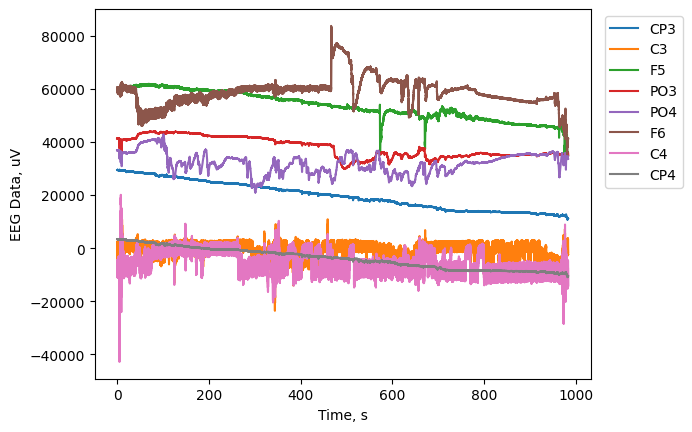

In [135]:
# import pandas as pd

# find EEG stream
eeg_stream = next(s for s in streams if s["info"]["type"][0] == "EEG")

eeg_data = eeg_stream["time_series"]
eeg_time = eeg_stream["time_stamps"]
eeg_time = [t - eeg_time[0] for t in eeg_time]

channels = [ch['label'][0] for ch in eeg_stream["info"]["desc"][0]['channels'][0]['channel']]

channels = eeg_stream['info']['desc'][0]['channels'][0]['channel']

# channel_names = [ch['label'][0] for ch in channels]

#print(eeg_stream["info"]["desc"][0]["channels"][0].keys())
#print(eeg_stream["info"]["desc"][0]["channels"][0]["channel"][0].keys())
channel_names = []
for ch in range(len(eeg_stream["info"]["desc"][0]["channels"][0]["channel"])):
  for key, value in eeg_stream["info"]["desc"][0]["channels"][0]["channel"][ch].items():
    #print(key, value)
    if key == "name":
      channel_names.append(value[0])
#print(channel_names)

#df_eeg = pd.DataFrame(eeg_data, columns=channels)
#df_eeg['time'] = eeg_time
#print(df_eeg.head())

# plot the time on x-axis and 8 channels on y-axis
import matplotlib.pyplot as plt
plt.plot(eeg_time, eeg_data)
plt.xlabel('Time, s')
plt.ylabel('EEG Data, uV')
# put legend outside the plot
plt.legend(channel_names, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()



In [140]:
print(len(eeg_stream["info"]["desc"][0]["channels"][0]["channel"]))

# print(eeg_stream.keys())

for key, value in eeg_stream["info"].items():
    print(key, value)

8
name ['Crown-375']
type ['EEG']
channel_count ['8']
channel_format ['float32']
source_id ['3757ea7494abf737a3ad546425203a2f']
nominal_srate ['256.0000000000000']
version ['1.100000000000000']
created_at ['50.08257735900000']
uid ['e70ef216-fad0-4762-8e75-0a063837a834']
session_id ['default']
hostname ['Crown-375']
v4address [None]
v4data_port ['16572']
v4service_port ['16572']
v6address [None]
v6data_port ['16573']
v6service_port ['16573']
desc [defaultdict(<class 'list'>, {'manufacturer': ['Neurosity, Inc'], 'channels': [defaultdict(<class 'list'>, {'channel': [defaultdict(<class 'list'>, {'label': ['Channel 1'], 'name': ['CP3'], 'unit': ['microvolts'], 'type': ['EEG']}), defaultdict(<class 'list'>, {'label': ['Channel 2'], 'name': ['C3'], 'unit': ['microvolts'], 'type': ['EEG']}), defaultdict(<class 'list'>, {'label': ['Channel 3'], 'name': ['F5'], 'unit': ['microvolts'], 'type': ['EEG']}), defaultdict(<class 'list'>, {'label': ['Channel 4'], 'name': ['PO3'], 'unit': ['microvolts']

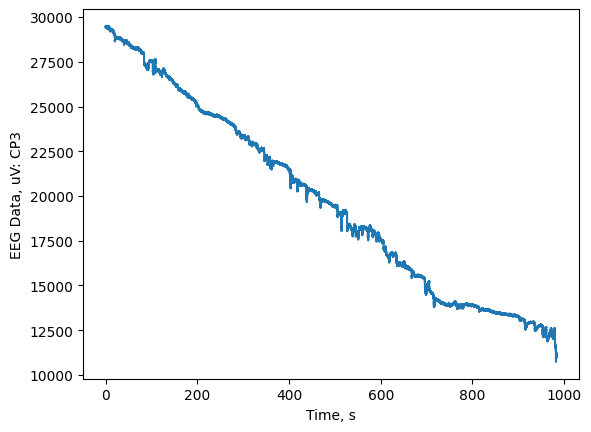

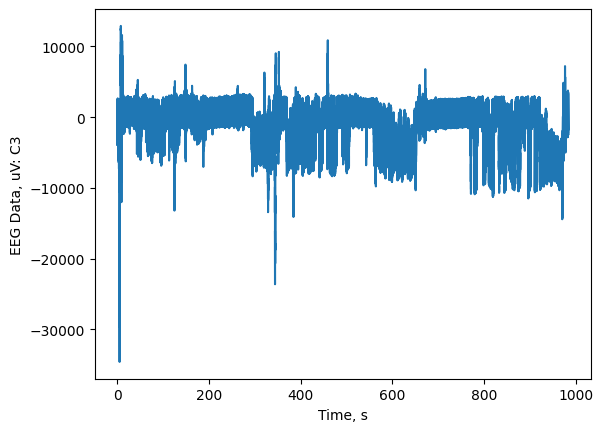

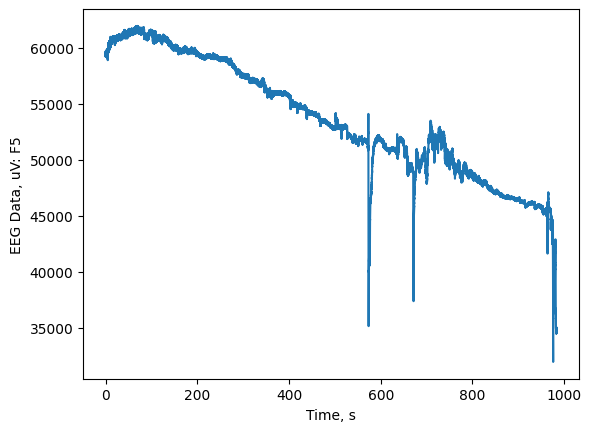

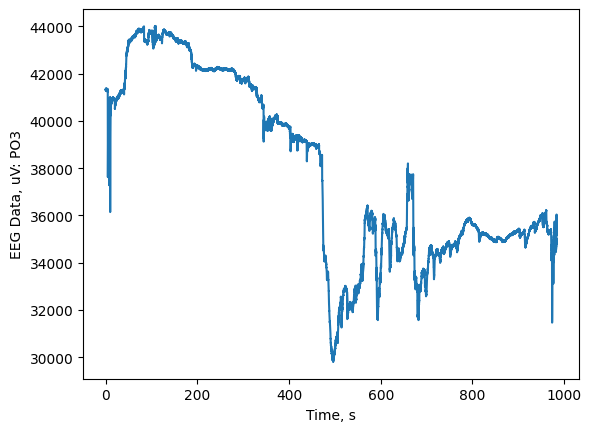

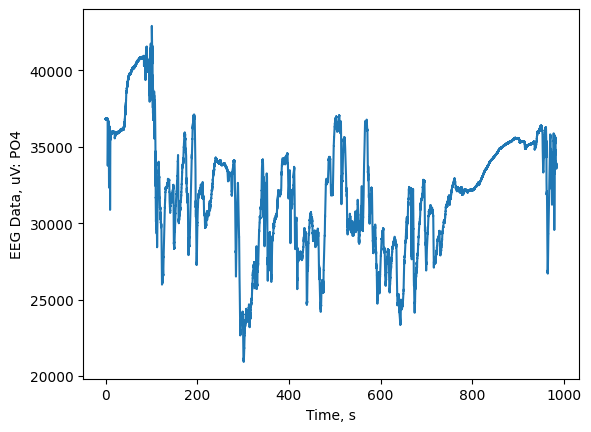

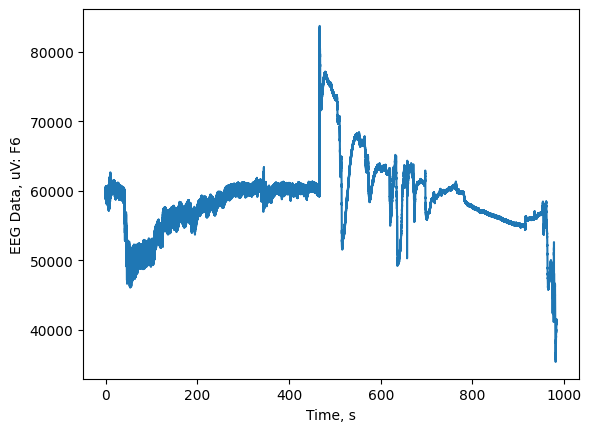

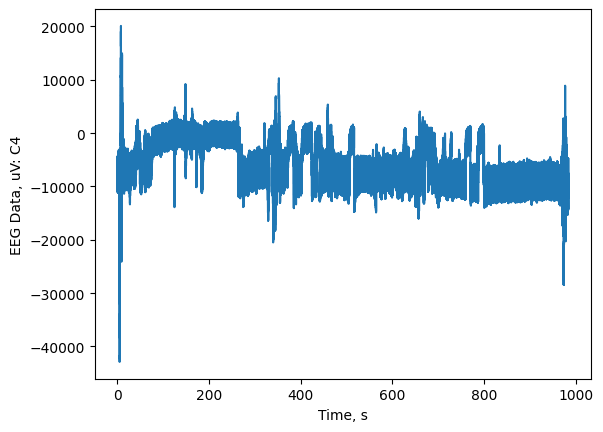

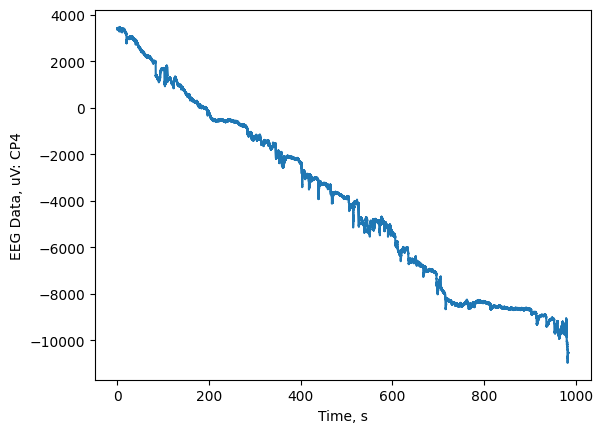

In [146]:
# get a column from the table
for c in range(eeg_data.shape[1]):
  data_column = eeg_data[:,c]
  plt.plot(eeg_time, data_column)
  plt.xlabel('Time, s')
  plt.ylabel('EEG Data, uV: ' + channel_names[c])# + str(c))
  count += 1
  plt.show()


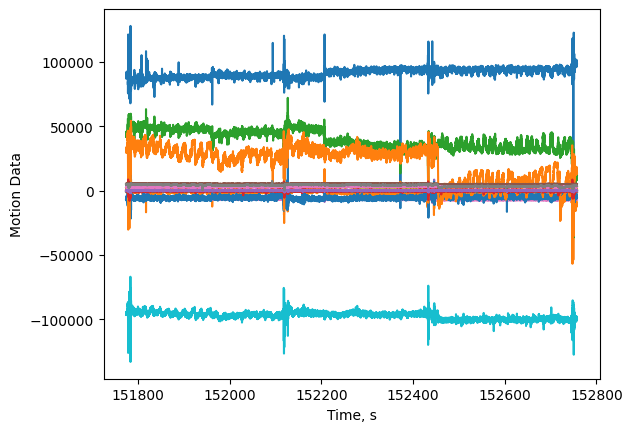

In [147]:
# find Motion stream
mot_stream = next(s for s in streams if s["info"]["type"][0] == "Motion")
mot_data = mot_stream["time_series"]
mot_time = mot_stream["time_stamps"]

plt.plot(mot_time, mot_data)
plt.xlabel('Time, s')
plt.ylabel('Motion Data')
# put legend outside the plot
# plt.legend(df_eeg.head(), loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()


#channels = [ch['label'][0] for ch in eeg_stream["info"]["desc"][0]['channels'][0]['channel']]

#df_eeg = pd.DataFrame(eeg_data, columns=channels)
#df_eeg['time'] = eeg_time
#print(df_eeg.head())
# print(mot_time)

18


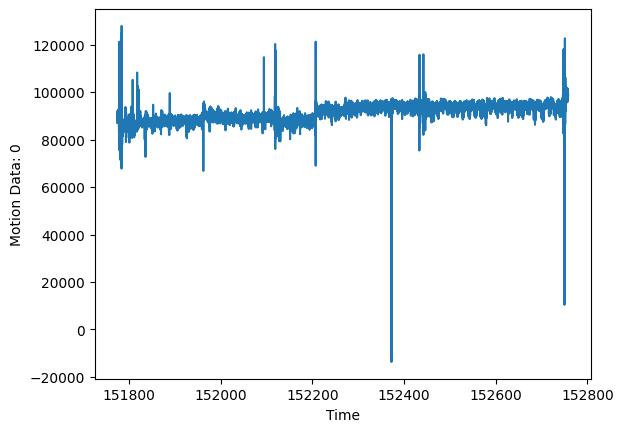

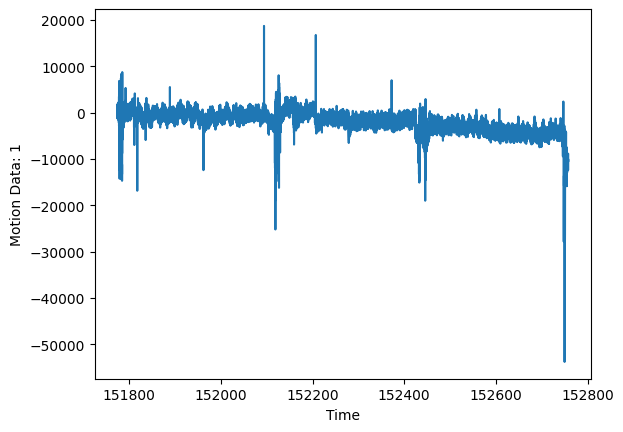

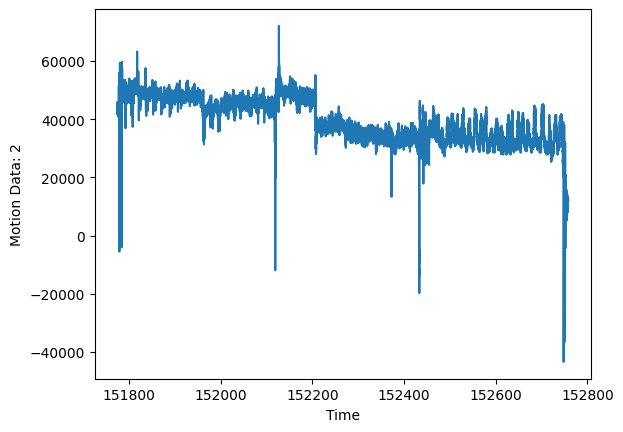

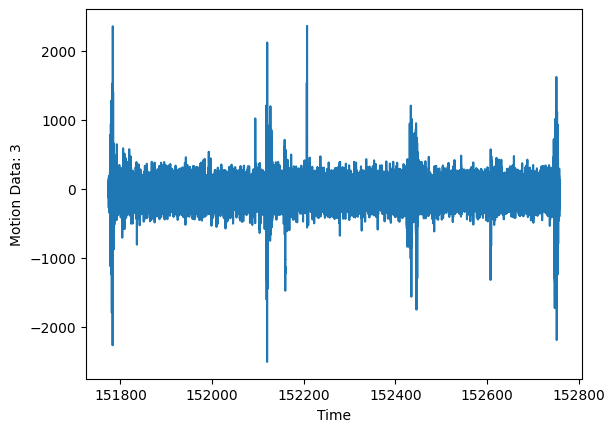

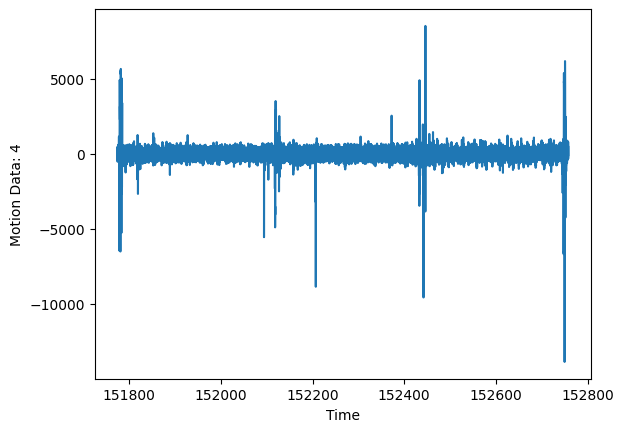

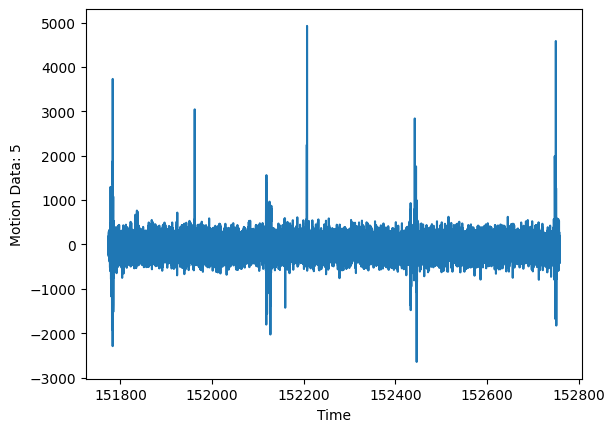

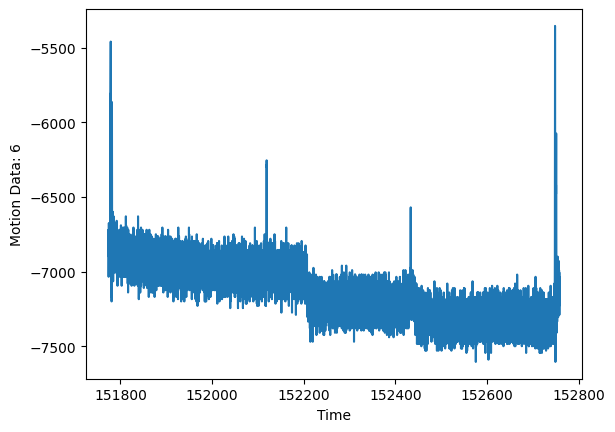

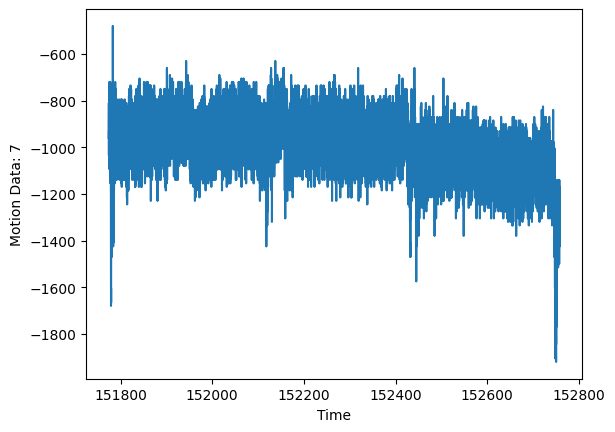

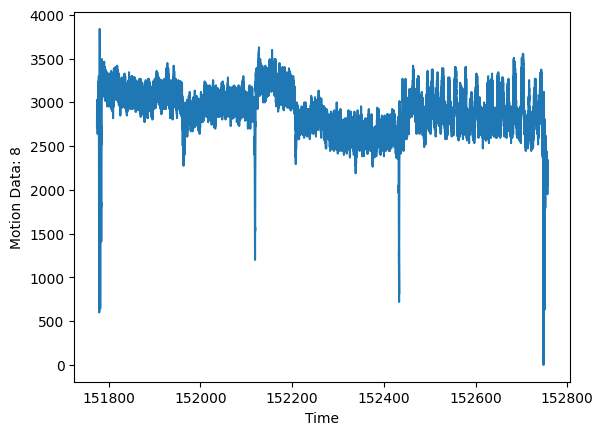

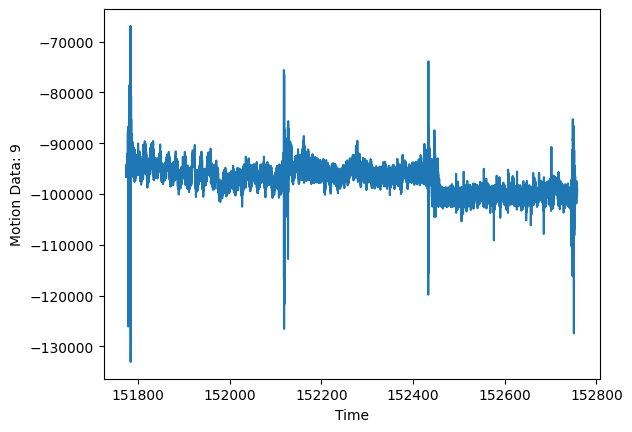

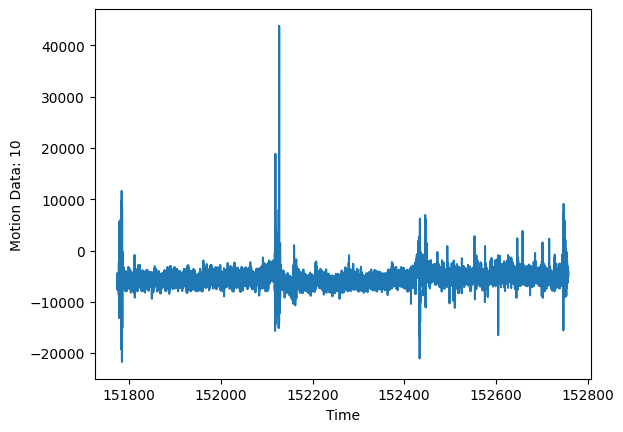

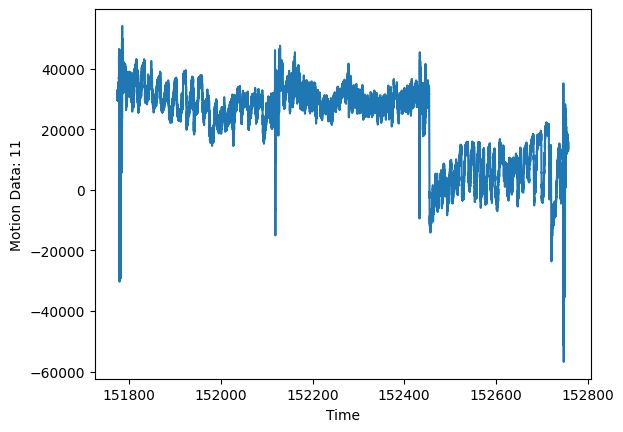

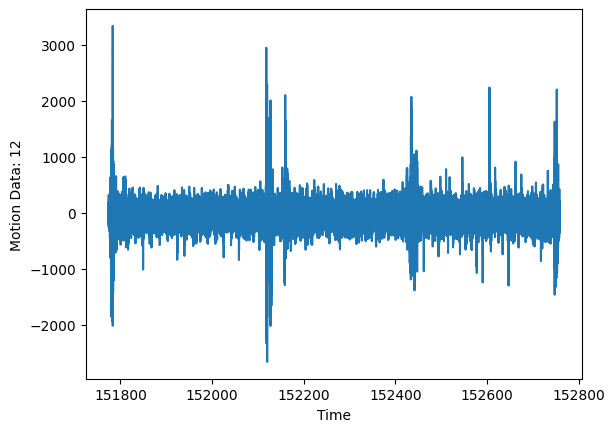

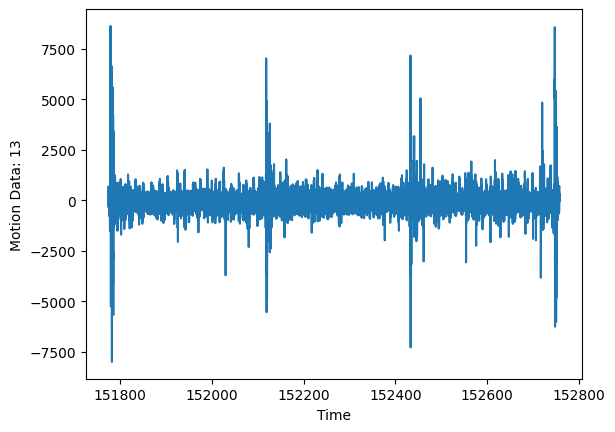

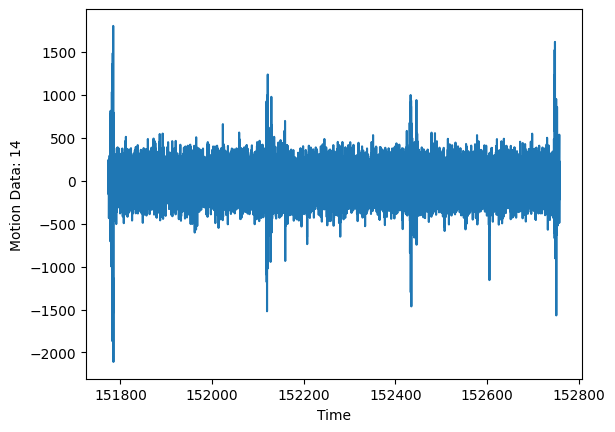

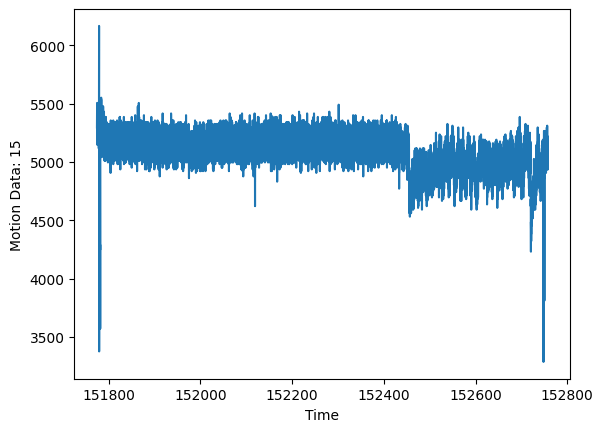

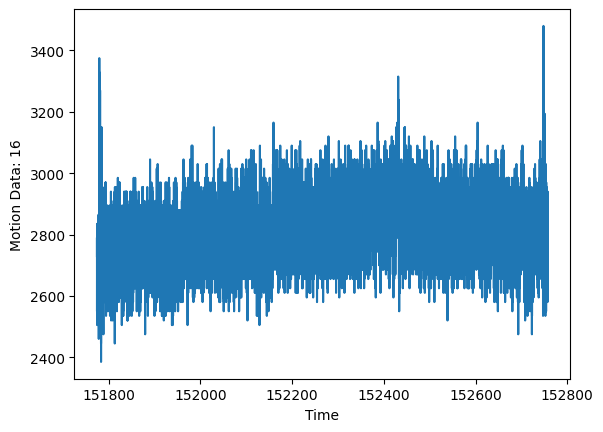

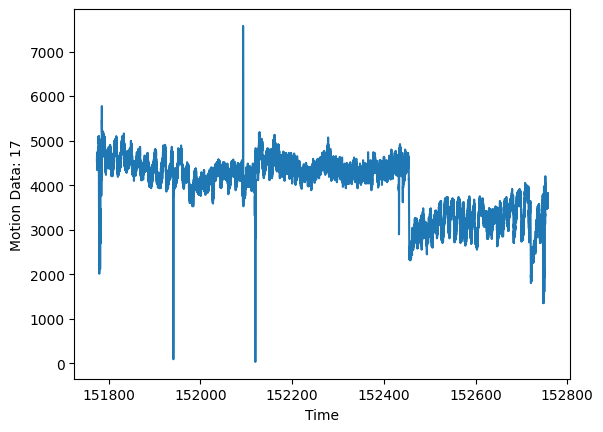

In [149]:
# print(mot_data.shape[1])
# get a column from the table
for c in range(mot_data.shape[1]):
  data_column = mot_data[:,c]
  plt.plot(mot_time, data_column)
  plt.xlabel('Time')
  plt.ylabel('Motion Data: ' + str(c))
  count += 1
  plt.show()




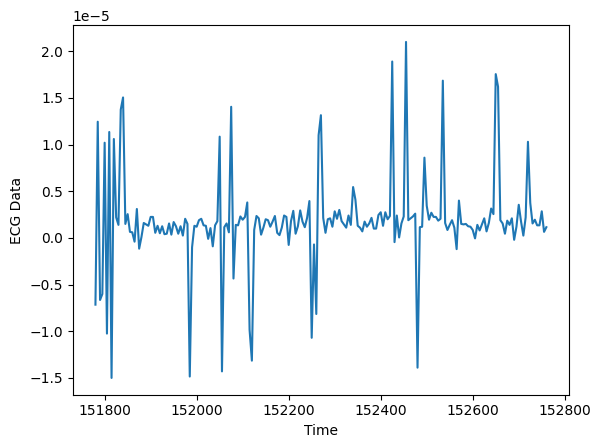

In [150]:
# find ECG stream
ecg_stream = next(s for s in streams if s["info"]["type"][0] == "ECG")
ecg_data = ecg_stream["clock_values"]
ecg_time = ecg_stream["clock_times"]

plt.plot(ecg_time, ecg_data)
plt.xlabel('Time')
plt.ylabel('ECG Data')
# plt.axis('tight') # set axis tight
plt.show()


In [36]:
#print(ecg_stream["info"]["desc"])
#print(ecg_stream["time_series"])
#print(ecg_stream.keys())
#print(ecg_stream["clock_times"])
#print(ecg_stream["clock_values"])

[]
dict_keys(['info', 'footer', 'time_series', 'time_stamps', 'clock_times', 'clock_values'])
[151779.97580155, 151784.97590435, 151789.97603725, 151794.97615489998, 151799.97624400002, 151804.97639195, 151809.97648735, 151814.9766626, 151819.9775821, 151824.97842, 151829.97860839998, 151834.97871185, 151839.97883185, 151844.9789696, 151849.97907394997, 151854.97917895, 151859.97929, 151864.9794371, 151869.97955709998, 151874.97966475, 151879.9797921, 151884.98006149998, 151889.98018905002, 151894.9813474, 151899.98138735, 151904.98151475, 151909.98159575, 151914.98187999998, 151919.9819976, 151924.98211065, 151929.9822618, 151934.98240064998, 151939.98251965002, 151944.98262845, 151949.98274240003, 151954.98324735, 151959.98335005, 151964.98346175003, 151969.98359935, 151974.98395184998, 151979.98509839998, 151984.98533025, 151989.9854282, 151994.98556300002, 151999.9865779, 152004.98669669998, 152009.98789275, 152014.98858995, 152019.98981240002, 152024.9908841, 152029.99128815002, 1

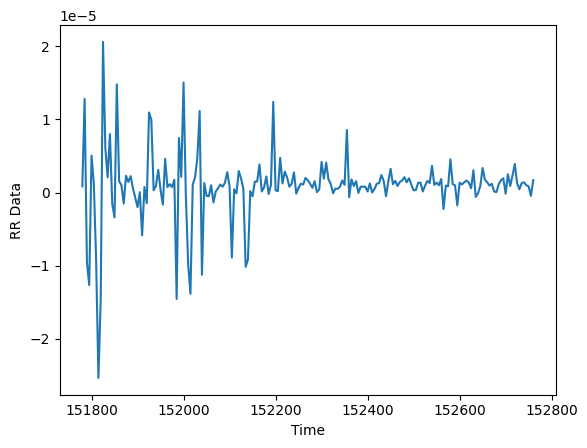

In [39]:
# find RR stream
rr_stream = next(s for s in streams if s["info"]["type"][0] == "RR")
rr_data = rr_stream["clock_values"]
rr_time = rr_stream["clock_times"]

plt.plot(rr_time, rr_data)
plt.xlabel('Time')
plt.ylabel('RR Data')
plt.show()

In [61]:
# find Markers stream
mark_stream = next(s for s in streams if s["info"]["type"][0] == "Markers")
mark_data = mark_stream["clock_values"]
mark_time = mark_stream["clock_times"]
#mark_data = mark_stream["time_series"]
#mark_time = mark_stream["time_stamps"]

#print(mark_stream.keys())
#print(mark_stream["info"].keys())
#print(mark_stream["footer"].keys())
print(mark_stream["footer"]["info"])
#for key, value in mark_stream["info"].items():
#    print(key, value)
#for key, value in mark_stream["footer"].items():
#    print(key, value)
#print(mark_stream["footer"])
#plt.plot(mark_time, mark_data)
#plt.xlabel('Time')
#plt.ylabel('Mark Data')
#plt.show()



defaultdict(<class 'list'>, {'first_timestamp': ['0'], 'last_timestamp': ['0'], 'sample_count': ['0'], 'clock_offsets': [defaultdict(<class 'list'>, {'offset': [defaultdict(<class 'list'>, {'time': ['27563.80577416699'], 'value': ['124216.168730533']}), defaultdict(<class 'list'>, {'time': ['27568.80359509849'], 'value': ['124216.1710169015']}), defaultdict(<class 'list'>, {'time': ['27573.79914675301'], 'value': ['124216.175574247']}), defaultdict(<class 'list'>, {'time': ['27578.80348543503'], 'value': ['124216.171358765']}), defaultdict(<class 'list'>, {'time': ['27583.80346203351'], 'value': ['124216.1714867665']}), defaultdict(<class 'list'>, {'time': ['27588.8050049755'], 'value': ['124216.1700669245']}), defaultdict(<class 'list'>, {'time': ['27593.80323961949'], 'value': ['124216.1719427805']}), defaultdict(<class 'list'>, {'time': ['27598.8055351225'], 'value': ['124216.1697633775']}), defaultdict(<class 'list'>, {'time': ['27603.80543923801'], 'value': ['124216.169989962']}),